# Covid model
This project is for WAMM 2021 done by Hinda Nguyen and Katie Johnston

In [1]:
#import libraries that might be useful
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

In [45]:
#define some variables that will be useful
total_pop = 1e3 #how many people in our population
people = [total_pop - 1, 1, 0] #total number of people in each group, S I R

people_interact = total_pop*.2 #how many people everyone interacts with everyday
infect_chance = 0.5 #chance get infected after interaction
days_infectious = 10 #number of days an infected person can infect other people

##what other variables might we need

In [39]:
def one_day(people):
    #Run 1 day of simulation
    #people will interact with people_interact number of people and then may or may not be infected
    for i in range(int(people[1])):
        for n in range(int(people_interact)):
            rand = random.random()
            if( rand < people[0]/total_pop): #suspetible person
                coin_toss=random.randint(0,1)
                if coin_toss==1:
                    people[0]-=1
                    people[1]+=1
                else:
                    people[0]-=0                
                    people[1]+=0
            else: #infected
                pass
    #could change people array as needed for new number of infections, ... or make new variable
    return people

#what are some other functions that might be useful for our simulation

4


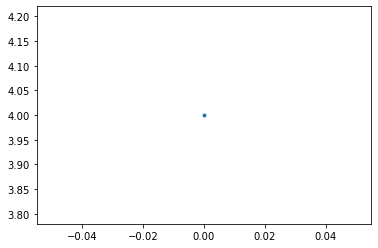

8
12
16
21


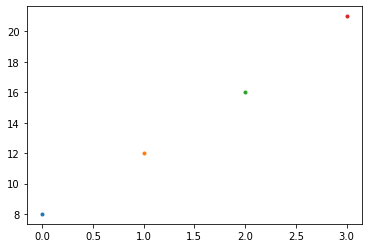

23
29
35
40
47
53
59
66
72
79
83
87
93
97
100
102
105
110
114
118
123


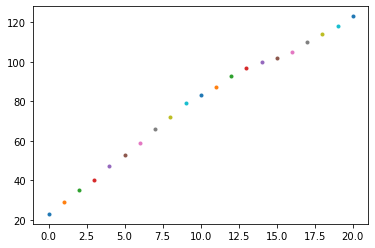

129
134
139
141
142
146
150
156
158
162
165
169
171
173
177
181
183
186
194
200
204
208
211
213
216
218
221
226
229
233
239
242
247
254
257
258
258
263
266
269
271
272
275
279
283
288
290
292
294
299
304
306
308
309
312
316
318
322
327
332
334
337
342
344
349
349
351
351
354
355
356
362
364
367
369
373
377
381
382
385
387
388
391
394
396
401
402
404
407
413
416
418
420
426
427
431
434
436
440
442
446
449
451
454
455
457
458
459
462
464
466
469
471
472
476
478
481
484
485
486
492
493
496


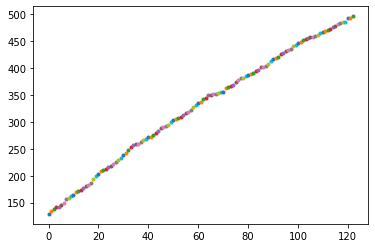

499
501
505
508
511
514
514
515
518
522
526
531
534
536
537
538
540
542
544
546
551
551
552
555
558
561
562
564
565
567
567
569
572
573
574
576
578
580
584
584
587
589
592
594
596
599
600
604
608
610
613
614
617
619
620
620
620
622
624
627
631
632
635
637
640
642
643
643
646
649
652
653
654
654
657
658
659
661
664
665
666
669
670
672
675
675
676
678
679
679
680
682
683
684
685
688
690
692
693
695
699
700
701
701
703
703
704
706
706
708
709
712
713
715
715
717
719
721
724
724
725
727
730
731
732
733
735
735
737
739
741
741
741
741
741
742
743
745
746
748
748
749
749
750
751
752
755
756
760
761
762
764
766
767
769
770
773
773
776
777
778
778
779
781
782
782
782
785
785
786
786
787
787
788
788
791
793
795
795
796
797
798
798
798
799
800
803
803
803
803
805
805
806
806
806
806
810
810
815
816
817
817
817
819
820
823
824
824
825
827
827
827
827
827
827
827
828
830
830
831
832
832
833
834
835
835
836
836
837
839
840
840
842
843
844
845
845
846
847
848
849
850
851
851
852
852
854
854
855
858


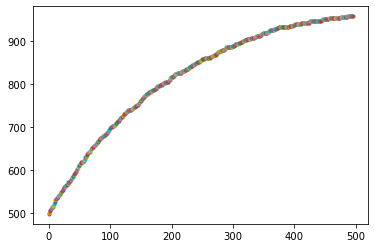

958
958
958
958
958
958
958
959
959
960
960
961
961
961
961
961
961
961
961
962
963
963
963
963
963
963
963
963
963
963
963
963
964
964
964
964
964
966
967
967
968
969
969
969
969
969
969
969
969
969
969
969
969
969
969
969
969
969
970
970
970
970
970
970
970
970
970
970
970
970
970
970
970
970
970
970
971
971
971
971
971
971
972
972
972
972
972
972
972
972
973
973
973
973
973
973
973
973
975
975
975
975
975
975
975
975
975
975
975
975
975
976
976
976
977
977
977
977
977
977
977
977
977
977
977
977
977
977
977
977
977
977
977
979
979
979
979
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
980
981
981
981
981
981
981
981
981
981
981
981
981
981
981
981
981
981
981
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
982
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
983
984
984
984
984
984
984
984
984
984
984
984
984
985
985
985
985
985
985
985
985
985
985
985
985
985
985
985
985
986
987
987
987
987
988
988
988


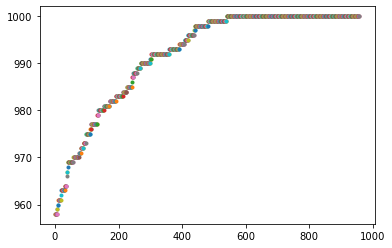

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


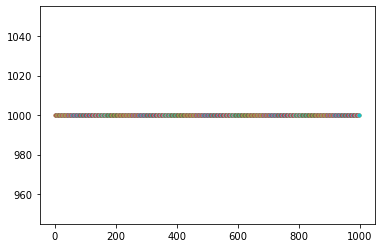

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


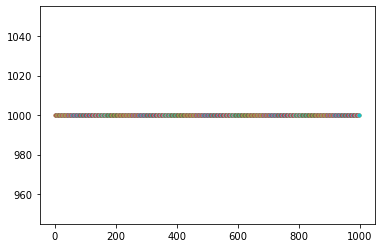

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


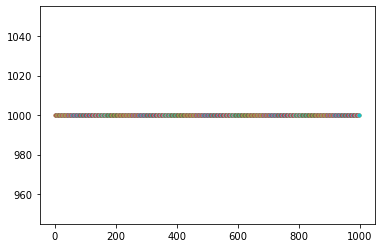

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


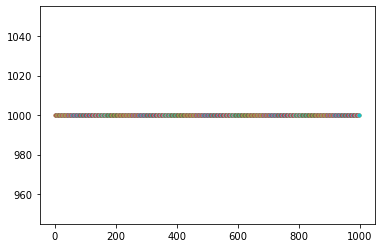

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


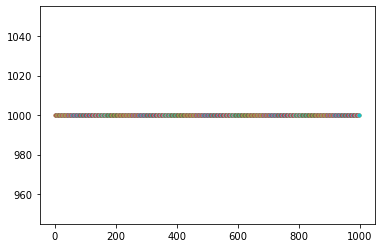

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


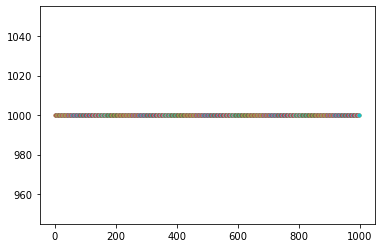

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


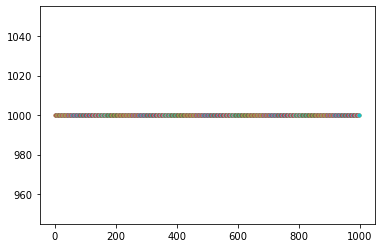

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


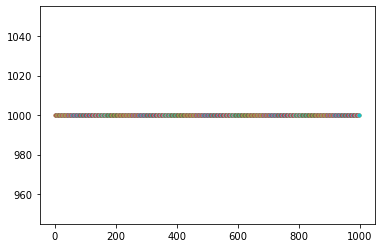

[   4.   21.  123.  496.  958. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000.]
[0.0, 996.0, 4.0]


In [41]:
people_infected=np.zeros((14))
def fourteen_days(people):#runs 14 days of simulation and stores number of infected people in an array
    for n in range(14):
        one_day(people)
        people_infected[n]=people[1]
        if(people_infected[n] == total_pop): #if everyone gets infected stop
            return people_infected
    return people_infected
# print(fourteen_days(people))
people_infected = fourteen_days(people)
print(people_infected)

#not sure how to shift list and add new entry 
people[2]=people_infected[0]
people[1]-=people_infected[0]
print(people)

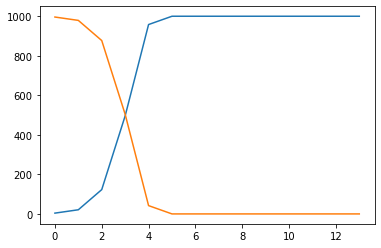

In [43]:
plt.plot(people_infected)
plt.plot(total_pop - people_infected)

In [5]:
def one_day_ideal(people):
    #Run 1 day of simulation
    #people will interact with people_interact number of people and then may or may not be infected
    people[0]-=people_interact*infect_chance
    people[1]+=people_interact*infect_chance
    #could change people array as needed for new number of infections, ... or make new variable
    return people

#what are some other functions that might be useful for our simulation

0.2


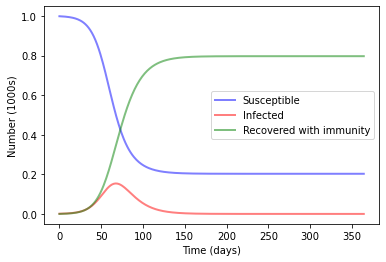

In [46]:
#taken from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

# Total population, N.
N = total_pop
t_max = 365
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = people_interact/total_pop
print(beta)
gamma = 1./days_infectious
# A grid of time points (in days)
t = np.arange(0,t_max, 1)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time (days)')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()